In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Hotel_Reservation_Data=pd.read_csv("C:\\new python\\ML_CAPSTONE\\Hotel_Reservations.csv")
Hotel_Reservation_Data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Performing Exploratory Data Analysis (EDA)

In [4]:
Hotel_Reservation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
# Check the presence of duplicate values or not
Hotel_Reservation_Data.duplicated().sum()

0

In [6]:
# Check for Missing Values
Hotel_Reservation_Data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
Hotel_Reservation_Data = Hotel_Reservation_Data.drop(columns='Booking_ID')

In [8]:
len(Hotel_Reservation_Data.columns)

18

In [9]:
# Categorical Features present in the dataset
Categorical_Features = Hotel_Reservation_Data.select_dtypes(['object'])
Categorical_Features.columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [10]:
# Numerical Features present in the dataset
Numerical_Features = Hotel_Reservation_Data.select_dtypes(['float64','int64'])
Numerical_Features.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

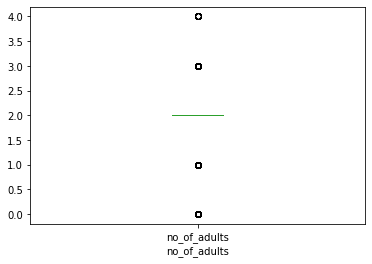

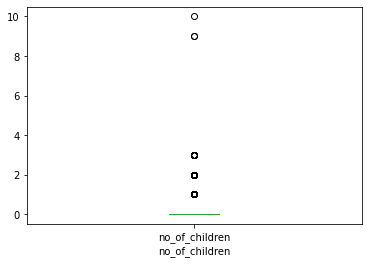

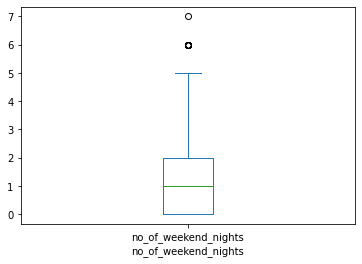

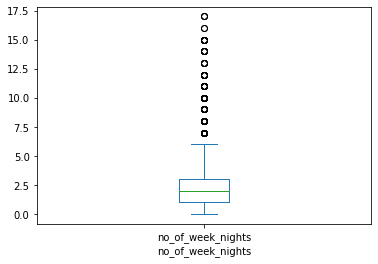

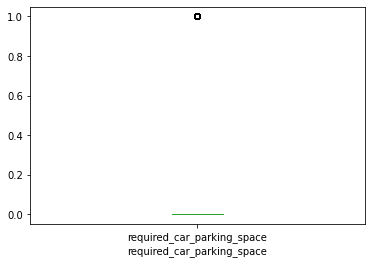

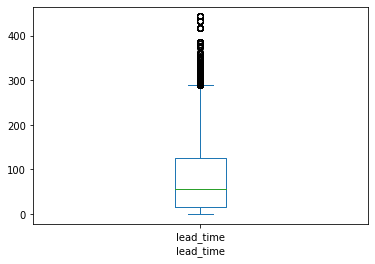

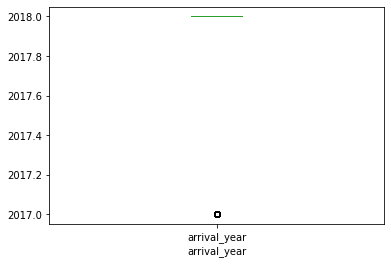

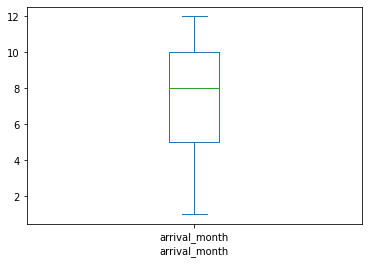

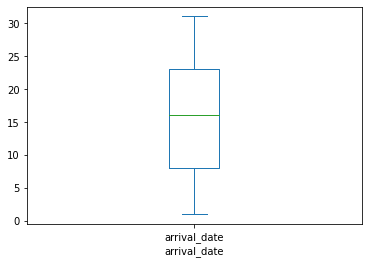

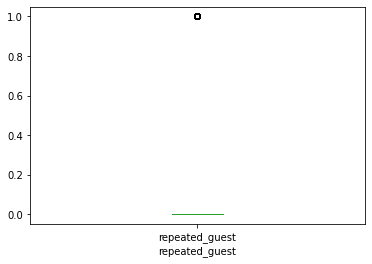

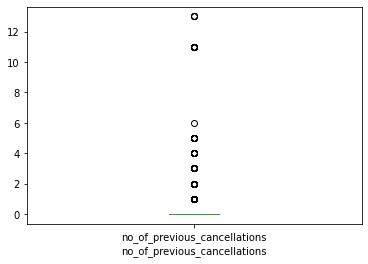

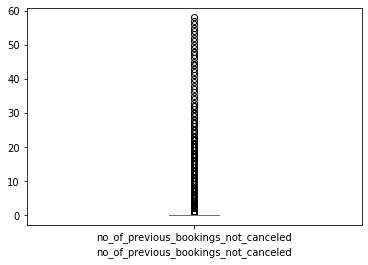

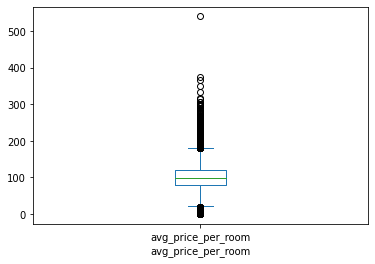

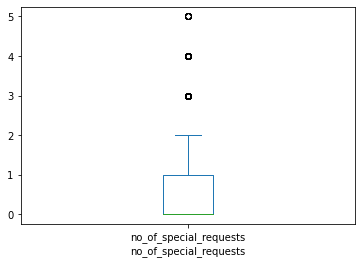

In [11]:
# box plot to detect outlier in dataset
for i in Numerical_Features.columns:
    Hotel_Reservation_Data[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

In [12]:
#outlier treatment function declare (detect & changing the value)
def outlier_var(x):
    if ((x.dtype=="float") or (x.dtype == "int64")):
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lc = q1 - 1.5 * iqr
        uc = q3 + 1.5 * iqr
        x = x.clip(lower = lc, upper = uc)
    else:
        x
    return x 

In [13]:
Hotel_Reservation_Data  = Hotel_Reservation_Data.apply(outlier_var)    #outlier treatmemnt function called

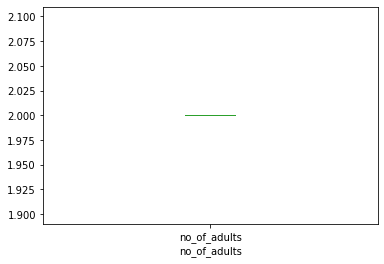

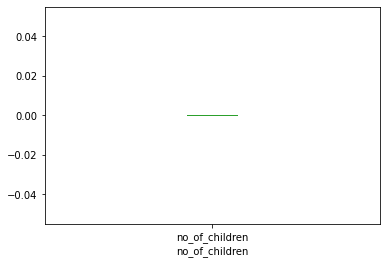

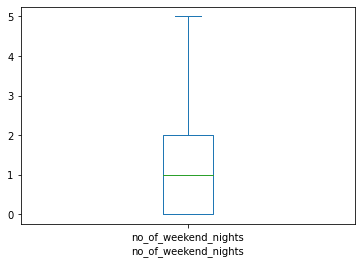

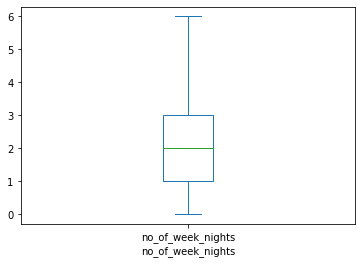

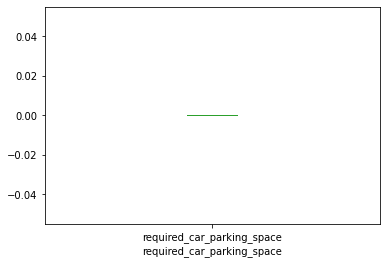

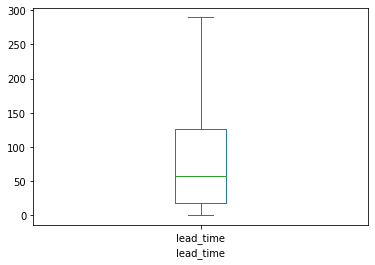

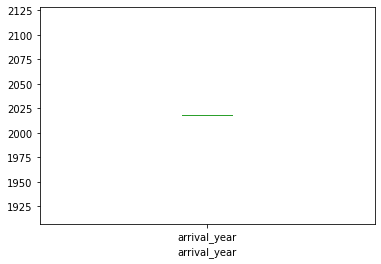

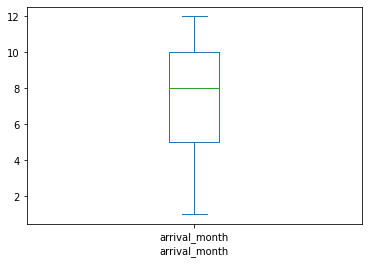

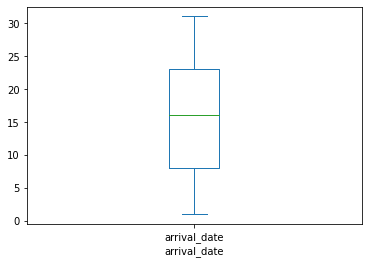

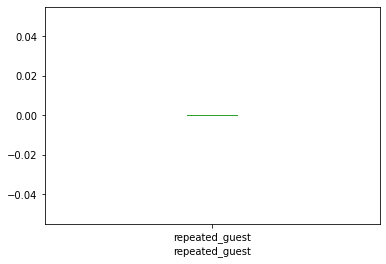

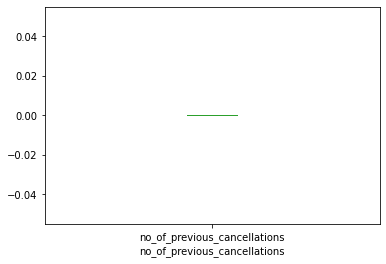

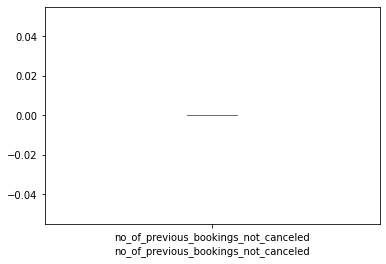

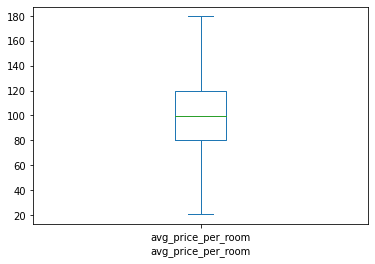

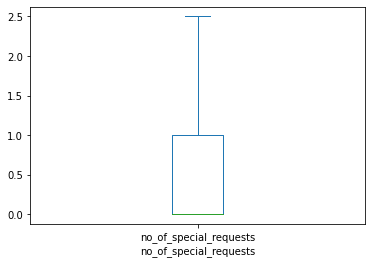

In [14]:
# box plot after treating the detected outlier in dataset
for i in Numerical_Features.columns:
    Hotel_Reservation_Data[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

no_of_adults
0.0


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\new python\venv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


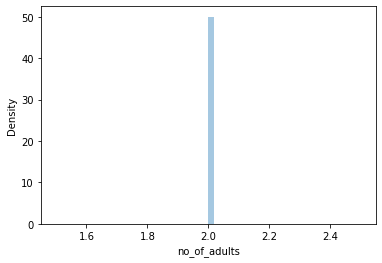

no_of_children
0.0


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\new python\venv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


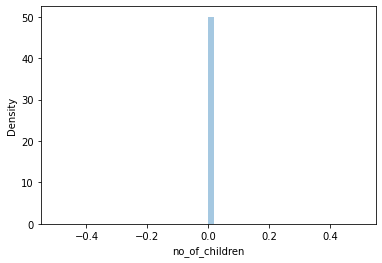

C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


no_of_weekend_nights
0.6852788147950205


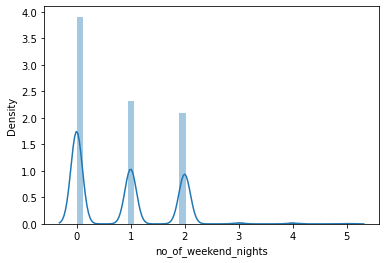

no_of_week_nights
0.604579669967297


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


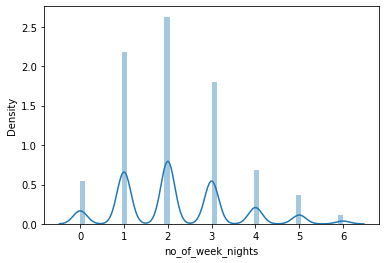

required_car_parking_space
0.0


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\new python\venv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


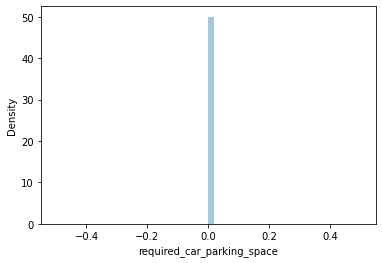

lead_time
1.0732941440527415


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


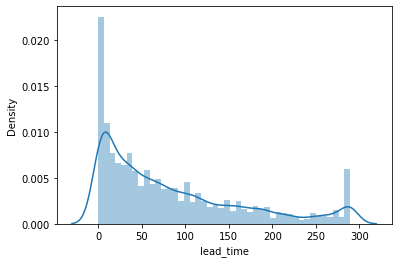

arrival_year
0.0


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\new python\venv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


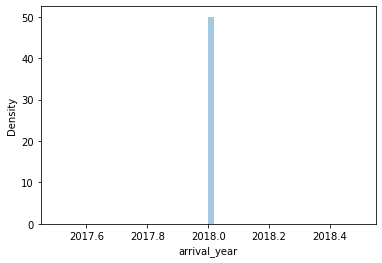

arrival_month
-0.3482144521729693


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


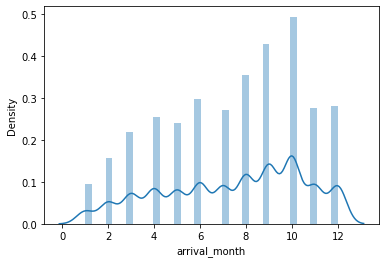

arrival_date
0.02880737786859992


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


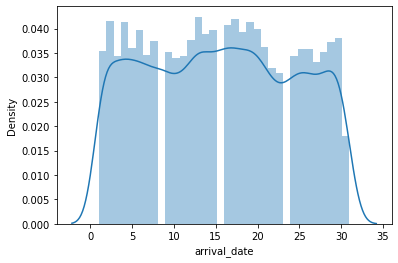

repeated_guest
0.0


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\new python\venv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


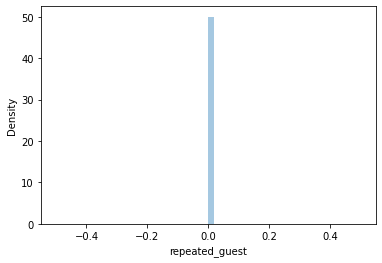

no_of_previous_cancellations
0.0


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\new python\venv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


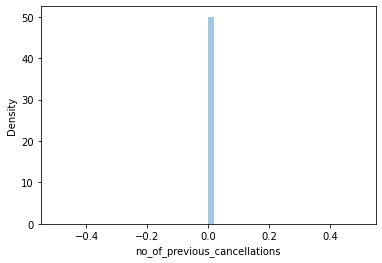

no_of_previous_bookings_not_canceled
0.0


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\new python\venv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


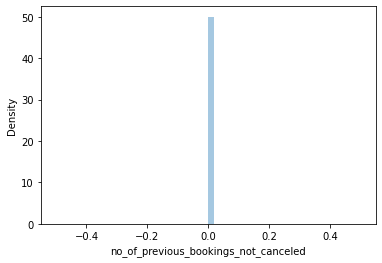

C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


avg_price_per_room
0.3464213145463844


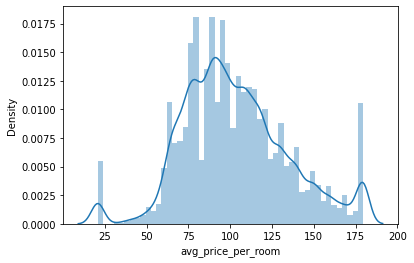

no_of_special_requests
0.876591135627164


C:\new python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


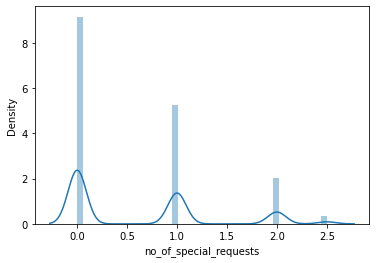

In [15]:
from scipy.stats import skew                     #checking distribution of data
for col in Numerical_Features.columns:
    print(col)
    print(skew(Hotel_Reservation_Data[col]))
    
    plt.figure()
    sns.distplot(Hotel_Reservation_Data[col])
    plt.show()

As we can see there are most features where skewness value lies in between 0 to 0.5, so we can say they are fairly symmetric. But there are some features for which skewness values is quite high so we can reduce the skewness of data with different transformation and if it still remains same we can use random forest for modelling purpose

In [16]:
Categorical_Features.columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [17]:
Categorical_Features.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [18]:
Categorical_Features.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [19]:
Categorical_Features.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [20]:
Categorical_Features.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [21]:
# converting target variable into numerical value
Hotel_Reservation_Data['booking_status'] = np.where((Hotel_Reservation_Data['booking_status'] == 'Canceled'),1,0)

In [22]:
Hotel_Reservation_Data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,Meal Plan 1,0.0,Room_Type 1,224.0,2018.0,10,2,Offline,0.0,0.0,0.0,65.00,0.0,0
1,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11,6,Online,0.0,0.0,0.0,106.68,1.0,0
2,2.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2,28,Online,0.0,0.0,0.0,60.00,0.0,1
3,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5,20,Online,0.0,0.0,0.0,100.00,0.0,1
4,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4,11,Online,0.0,0.0,0.0,94.50,0.0,1


In [23]:
Hotel_Reservation_Data['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [24]:
#seperating dependt and indpnt variables

In [25]:
X = Hotel_Reservation_Data.iloc[:,0:17]    

In [26]:
Y = Hotel_Reservation_Data.iloc[:,-1]

Creating Train data and Test data

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,
                                              test_size=0.3,
                                              random_state=42,
                                              )

In [28]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
29580,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,200.0,2018.0,8,29,Online,0.0,0.0,0.0,90.95,0.0
6325,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,79.0,2018.0,3,24,Online,0.0,0.0,0.0,90.95,1.0
33899,2.0,0.0,1.0,4.0,Meal Plan 1,0.0,Room_Type 4,78.0,2018.0,4,6,Online,0.0,0.0,0.0,99.45,1.0
720,2.0,0.0,2.0,0.0,Meal Plan 1,0.0,Room_Type 1,61.0,2018.0,10,4,Offline,0.0,0.0,0.0,91.00,0.0
22120,2.0,0.0,0.0,4.0,Meal Plan 1,0.0,Room_Type 1,201.0,2018.0,11,1,Online,0.0,0.0,0.0,82.28,2.5


In [29]:
X_train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [30]:
X_test.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [31]:
y_train.head()

29580    1
6325     1
33899    0
720      0
22120    0
Name: booking_status, dtype: int32

In [32]:
y_test.head()

4968     0
34540    0
36108    0
1553     1
24974    0
Name: booking_status, dtype: int32

In [33]:
# converting categorical features to Numerical Features  (using one hot encoding)
x_train = pd.get_dummies(X_train,columns=['type_of_meal_plan','room_type_reserved','market_segment_type']) 
print(x_train.shape)
x_test = pd.get_dummies(X_test,columns=['type_of_meal_plan','room_type_reserved','market_segment_type']) 
print(x_test.shape)


(25392, 30)
(10883, 30)


In [34]:
# feature selection
from sklearn.feature_selection import SelectKBest,chi2
fs = SelectKBest(score_func= chi2, k=20)
fs.fit(x_train, y_train)
X_train_fs = fs.transform(x_train)
X_test_fs = fs.transform(x_test)
y_1 = x_train.columns[fs.get_support()]
z_1 = x_test.columns[fs.get_support()]
X_train_1 = pd.DataFrame(X_train_fs,columns = y_1)
X_test_1 = pd.DataFrame(X_test_fs, columns = z_1)                                  
print(X_train_1.shape, X_test_1.shape)

(25392, 20) (10883, 20)


Model Preparation:

In [35]:
from sklearn.ensemble import RandomForestClassifier
ModelRF= RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
ModelDT = DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression
ModelLR= LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
ModelKN= KNeighborsClassifier(n_neighbors=8)

from sklearn.naive_bayes import GaussianNB
ModelGN= GaussianNB()

from sklearn.svm import SVC
ModelSVC= SVC()






In [36]:
MLA=[ModelRF,ModelDT,ModelLR,ModelKN,ModelGN,ModelSVC]

In [37]:
from sklearn.metrics import mean_squared_error,confusion_matrix,precision_score,f1_score,recall_score,roc_curve

In [38]:
#printing the table
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:


    predicted=alg.fit(X_train_1, y_train).predict(X_test_1)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_1, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_1, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'F1_score'] = f1_score(y_test, predicted)
    
    row_index+=1
# MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)


C:\new python\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,F1_score
0,RandomForestClassifier,0.9937,0.9002,0.884416,0.803992,0.842289
1,DecisionTreeClassifier,0.9938,0.8636,0.792022,0.798170,0.795084
2,LogisticRegression,0.8003,0.8001,0.736304,0.618520,0.672292
3,KNeighborsClassifier,0.8388,0.8077,0.809485,0.548933,0.654221
4,GaussianNB,0.4265,0.4352,0.367155,0.973108,0.533151
5,SVC,0.7697,0.7684,0.776477,0.422789,0.547478


In [40]:
#Training accuracy is 0.9938

#Testing accuracy is 0.9009